<img src="../qiskit-tutorial/images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## Notebook 1: <br> IBM Q Experience Basics - Interacting via API

This noteboks contains the basics interacting with the IBM Q Experience via their API:
- How to connect using the API Token

***
### Author
[Rodolfo Ferro](https://github.com/RodolfoFerro/)

<br><br>
## Connecting with the IBM Q Experience API

In [1]:
import getpass, time
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit,  available_backends, execute, register, get_backend
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

APItoken = getpass.getpass('Please input your token and hit enter: ')
qx_config = {
    "APItoken": APItoken,
    "url":"https://quantumexperience.ng.bluemix.net/api"}

try:
    register(qx_config['APItoken'], qx_config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

Please input your token and hit enter: ········

You have access to great power!
['ibmqx4', 'ibmqx5', 'ibmqx2']


## Get queues from devices

In [2]:
def lowest_pending_jobs():
    """
    Returns the backend with lowest pending jobs.
    """
    
    # Get list of available backends:
    list_of_backends = available_backends(
        {'local': False, 'simulator': False})
    
    # Get device status from backend:
    device_status = [get_backend(backend).status 
                     for backend in list_of_backends]

    # Get best device (with shortest queue):
    best = min([x for x in device_status if x['available'] is True], 
               key=lambda x: x['pending_jobs'])
    
    return best['name']

In [3]:
# Load backend:
backend = lowest_pending_jobs()
print("The best backend is {}.".format(backend))

The best backend is ibmqx4.


## Creation of a Quantum Circuit

In [4]:
# Create a Quantum Register with the number of qubits:
q = QuantumRegister(1)

# Create a Classical Register with the number of measures:
c = ClassicalRegister(1)

# Build the Quatum Circuit with the previous registers:
qc = QuantumCircuit(q, c)

# Create a NOT gate to QuantumRegister[0] (q[0]):
qc.x(q[0])

# Measure registers:
qc.measure(q, c)

## Execution and status of execution

In [5]:
# Execute the Quantum Circuit:
job_exp = execute(qc, backend=backend, shots=1024, max_credits=3)



# Checkout the execution during 10s intervals:
lapse = 0
interval = 10

while not job_exp.done:
    # Print status:
    print('Status @ {} seconds'.format(interval * lapse))
    for key, value in job_exp.status.items():
        print('· {}: {}'.format(key, value))
    
    # Wait some time until next check-up...
    time.sleep(interval)
    lapse += 1
    print()

# Print final status:
print('Status DONE @ {} seconds'.format(interval * lapse))
for key, value in job_exp.status.items():
    print('· {}: {}'.format(key, value))

Status @ 0 seconds
· job_id: None
· status: JobStatus.INITIALIZING
· status_msg: job is begin initialized please wait a moment

Status @ 10 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 33
· status: JobStatus.QUEUED
· status_msg: None

Status @ 20 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 33
· status: JobStatus.QUEUED
· status_msg: None

Status @ 30 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 33
· status: JobStatus.QUEUED
· status_msg: None

Status @ 40 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 33
· status: JobStatus.QUEUED
· status_msg: None

Status @ 50 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 30
· status: JobStatus.QUEUED
· status_msg: None

Status @ 60 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 30
· status: JobStatus.QUEUED
· status_msg: None

Status @ 70 seconds
· job_id: 5b2ba51fdc5d99003b3d648a
· queue_position: 30
· status: JobStatus.QUEUED
· status_msg: None

Status @ 80

## Plotting the results

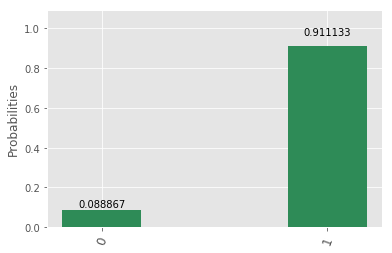

You have made entanglement!


In [6]:
# Plot the results:
plot_histogram(job_exp.result().get_counts(qc))
print('You have made entanglement!')

## Plotting the circuit

The circuit that was run on the machine is:

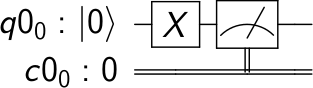

In [7]:
circuit_drawer(qc)